## Importing the libraries

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os

import matplotlib.pyplot as plt
import plotly.express as px

## Read the train file to understand its structure

In [3]:
train_df = pd.read_csv('/kaggle/input/tensorflow-great-barrier-reef/train.csv')
train_df.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]


In [15]:
for i in train_df.columns:
    train_df[i] = train_df[i].astype(str)

In [47]:
fig = px.histogram(train_df, x = 'video_id', title = 'Records for each video id')
fig.show()

In [48]:
train_df['box_count'] = train_df['annotations'].str.count('{').astype(str)
fig = px.histogram(train_df, x = 'box_count', title = 'Histogram with number of boxes')
fig.show()

In [46]:
train_df['target'] = np.where(train_df['box_count'] == '0', 0, 1)

print('Positive target percentage in each video:')
print(train_df[['video_id', 'target']].groupby('video_id').mean().reset_index())
print('\nOverall positive target percentage:', train_df['target'].mean())

Positive target in each video:
  video_id    target
0        0  0.319469
1        1  0.254981
2        2  0.079080

Overall positive target: 0.20931024211735672


## Read some images

In [55]:
def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels = 3)
    return img

def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

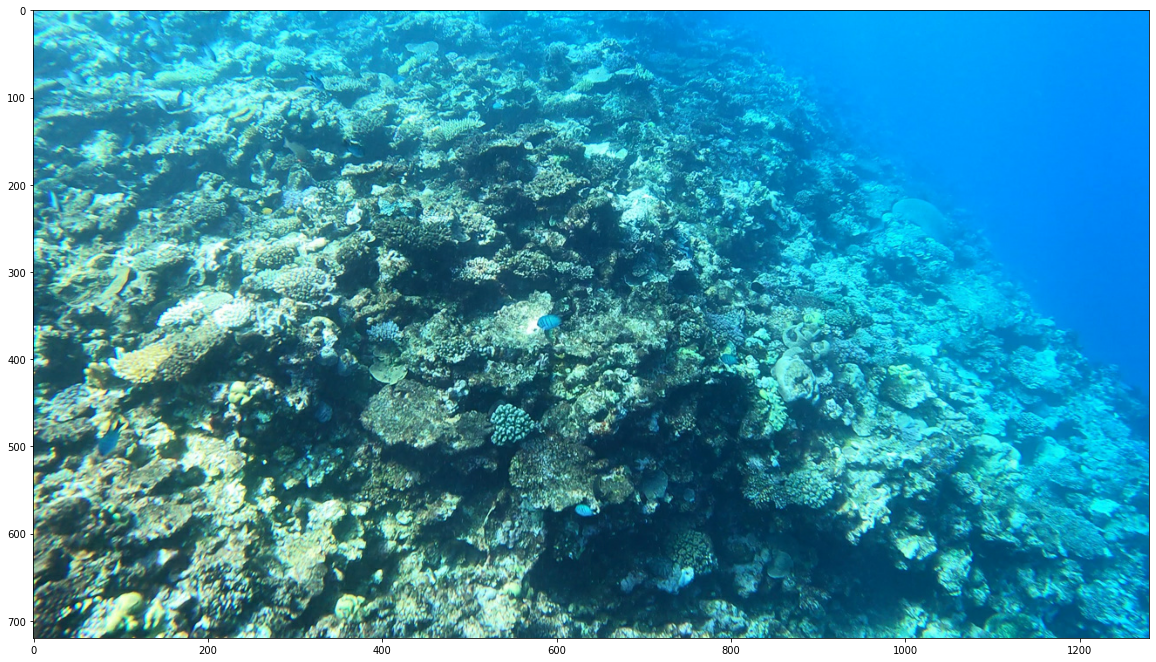

In [58]:
img = load_img('/kaggle/input/tensorflow-great-barrier-reef/train_images/video_0/0.jpg')
display_image(img)

## Read images and check the sizes

In [72]:
images_df = pd.DataFrame(columns = ['video_id', 'image_id', 'size'])

In [71]:
for dirname, _, filenames in os.walk('/kaggle/input/tensorflow-great-barrier-reef/train_images'):
    for filename in filenames:
        img = load_img(dirname + '/' + filename)
        images_df['video_id'] = dirname
        images_df['image_id'] = filename
        images_df['size'] = str(img.shape[1]) + ' ' + str(img.shape[0])

/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/6234.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/1269.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/3863.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/6241.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/10304.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/623.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/2193.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/2008.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/10730.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/5982.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/2081.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/10597.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/6588.jpg
/kaggle/input/tensorflow-great-barri